In [1]:
import os
import IPython
from PIL import Image
from PIL import PyAccess

In [2]:
import numpy as np

In [3]:
sharpen_kernel = np.array([[0, -1, 0],\
                           [-1, 5, -1],\
                           [0, -1, 0]])
edge_2_kernel = np.array([[0, -1, 0],\
                          [-1, 4, -1],\
                          [0, -1, 0]])
edge_kernel = np.array([[-1, -1, -1],\
                        [-1,  8, -1],\
                        [-1, -1, -1]])
blur_kernel = np.array([[1, 2, 1],\
                        [2, 4, 2],\
                        [1, 2, 1]]) * 1/16
emboss_kernel = np.array([[-2, -1,  0],\
                          [-1,  1,  1],\
                          [ 0,  1,  2]])

In [4]:
kernels = {'sharpen' : sharpen_kernel,\
           'edge': edge_kernel,\
           'edge_II' : edge_2_kernel,\
           'blur' : blur_kernel,\
           'emboss' : emboss_kernel}

In [5]:
image_name = "eye.jpg"

In [6]:
image_path = f"{os.getcwd()}\imgs\{image_name}"
image = Image.open(image_path)

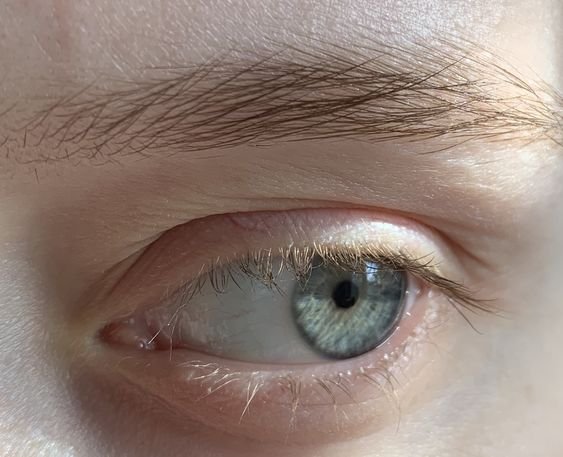

In [7]:
IPython.display.display(image)

In [12]:
import copy

def sample(pixels : PyAccess, image_size : tuple, mat_size : int, index : tuple) -> np.array:
    w, h = image_size
    mat = np.array([[np.array((0, 0, 0)) for i in range(mat_size)] for j in range(mat_size)])
    a = int((mat_size - 1) / 2)
    b = a
    for i in range(-a, a + 1):
        for j in range(-b, b + 1):
            x = index[0] - i
            y = index[1] - j
            if(x <= 0 or x >= w or y <= 0 or y >= h):
                continue
            mat[i + a][j + b] = np.array(image.getpixel((x, y)))
    return mat
        
def convolution(pixels : PyAccess, image_size : tuple, kernel : np.array, index : tuple) -> list:
    matrix_size = kernel.shape[0]
    img_sample = sample(pixels, image_size, matrix_size, index)
    output = np.array([0, 0, 0])
    for i in range(img_sample.shape[0]):
        for j in range(img_sample.shape[1]):
            pixel = img_sample[i, j] * kernel[i, j]
            int_pixel = pixel.astype(np.int32)
            output += int_pixel
    return output
    
    
def process_image(image : Image, kernel : np.array) -> Image:
    output_image = copy.deepcopy(image)
    image_size = image.size
    pixels = output_image.load()
    for i in range(image_size[0]):
        for j in range(image_size[1]):
            new_pixel = convolution(pixels, image_size, kernel, (i, j))
            pixels[i, j] = (int(new_pixel[0]), int(new_pixel[1]), int(new_pixel[2]))
    return output_image

sharpen


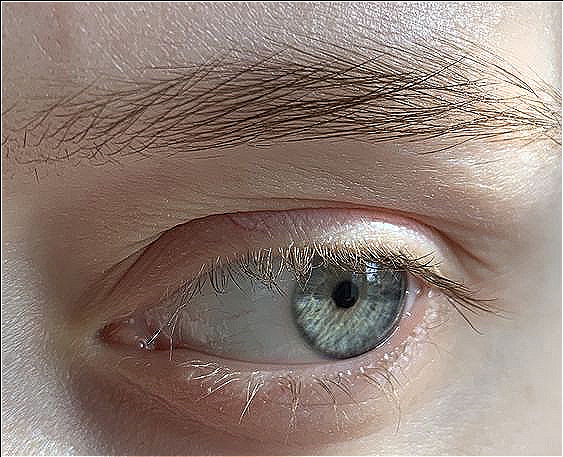

edge


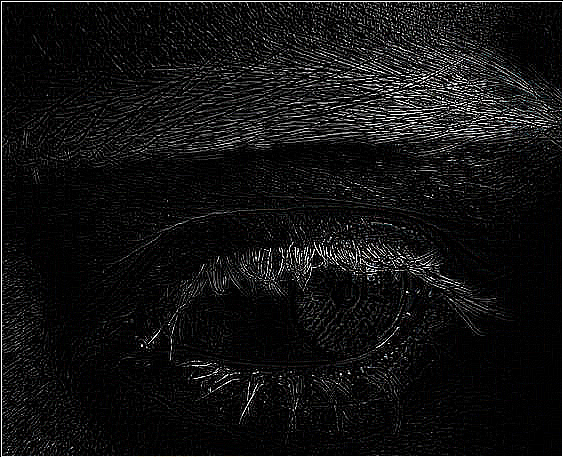

edge_II


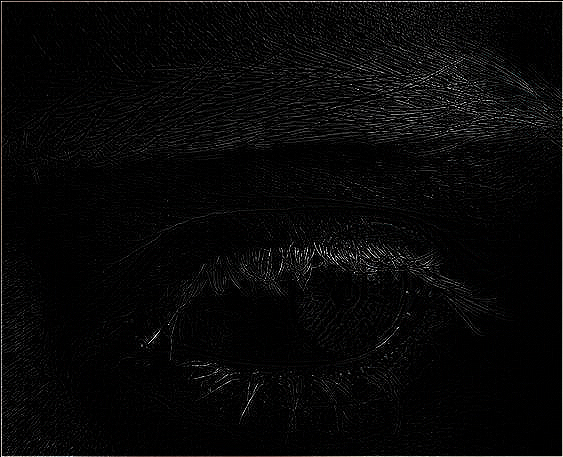

blur


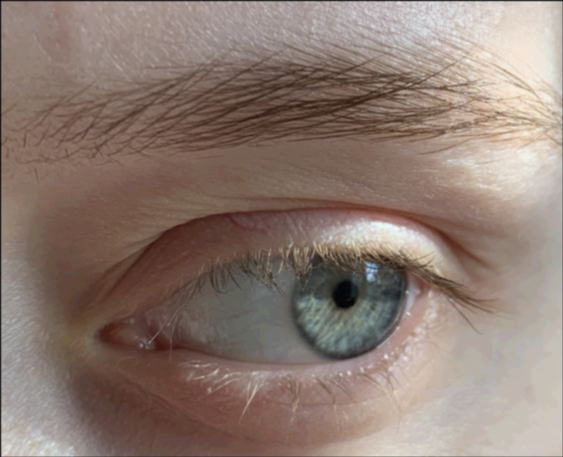

emboss


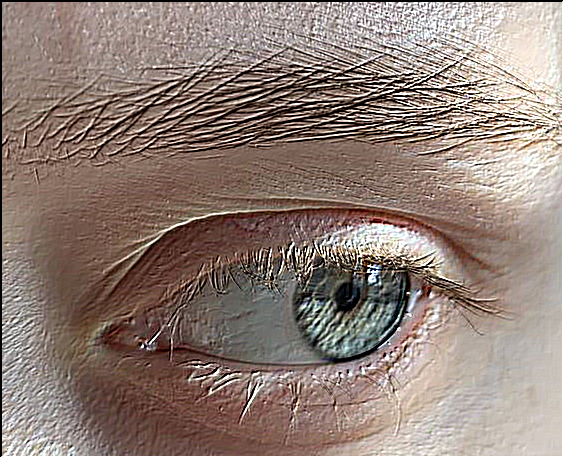

Elapsed:  54.77 s


In [13]:
import time
t0 = time.time()
for kernel in kernels:
    print(kernel)
    new_image = process_image(image, kernels[kernel])
    IPython.display.display(new_image)
print("Elapsed: ", format(time.time() - t0, '.2f'), "s")